In [77]:
# Start by importing all the necessary libraries fot our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In a dataframe name "tmdb_df" load "tmdb.movies.csv" file in the cell below using "pd.read_csv" format

# 1. Data Overview
    
1.1. Load and Inspect the Data

In a dataframe name "df" load "bigml_59c28831336c6604c800002a.csv" file in the cell below using "pd.read_csv" format



In [78]:
df = pd.read_csv("Data/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Now lets get familiar with the data we have in our df. This step will include
1. Understanding the dimentionality of our dataset
2. Investigating what type of data it contains, and the data types used to store it
3. Dicovering how missing values are encoded, and how many there are
4. Getting a feel for what information it does and doesn't contain

1.2 In the cell below,lets inspect the info printout of the dataframe

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The info() printout has provided us with a summary of our dataset, revealing key details about its structure and contents. Here's a brief explanation:

Number of Entries: The dataset contains 3,333 rows, indicating the number of records available for analysis.

Number of Columns: There are 21 columns, which include both features and the target variable (churn).

Data Types:

8 integer columns (int64): These likely represent counts or other discrete values (e.g., account length, number vmail messages).

8 float columns (float64): These are continuous numerical features (e.g., total day minutes, total day charge).

4 object columns (object): These are categorical variables (e.g., state, phone number, international plan).

One column (customer_id): This is a unique identifier for each customer.

1 boolean column (bool): The churn column, indicating whether a customer churned (True) or not (False).

Non-Null Counts: All columns have 3,333 non-null entries, meaning there are no missing values in the dataset.




1.3. We look for shape of our dataframe

In [80]:
df.shape

(3333, 21)

The shape (3333, 21) tells us that our dataset contains 3,333 records, with 21 features for each record. This is a key piece of information for understanding the size and complexity of the data we're working with.

1.4. Summary Statistics

We now get a summary of numerical features .

In [81]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The describe() function provides a summary of the numerical features in the dataset. It includes key statistics such as count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values. This can help us identify any outliers or skewness in the data.

    

1.5. Identify Missing Values: Check for missing values using isnull().sum().

In [82]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

It looks like there are no missing values in our dataset.

1.6. Data Types

Ensure that each column has the correct data type. Convert if necessary.

In [83]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

1.7. Unique Values

Inspect unique values in categorical columns to ensure there are no anomalies.

In [84]:
for column in df.select_dtypes(include=['object']).columns:
    print(f'{column} unique values: {df[column].unique()}')

state unique values: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
phone number unique values: ['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']
international plan unique values: ['no' 'yes']
voice mail plan unique values: ['yes' 'no']


1. state Column
Unique Values: The state column has a variety of state abbreviations, which seems normal.

Action: Convert the state column into numerical format using one-hot encoding. This will create a binary column for each state, allowing the model to utilize this categorical information effectively.

2. phone number Column
Unique Values: The phone number column has unique values for each entry.

Action: This column should be dropped because it doesn't provide useful information for predicting churn and might add noise to the model.

3. international plan Column
Unique Values: The international plan column has two values: 'no' and 'yes'.

Action: Encode this binary categorical feature using binary encoding (0 and 1). This can be done with label encoding or one-hot encoding.

4. voice mail plan Column
Unique Values: The voice mail plan column also has two values: 'yes' and 'no'.

Action: Similar to the international plan, encode this binary categorical feature using binary encoding (0 and 1).

In [85]:
# Drop the 'phone number' column as it's not needed
df = df.drop(columns=['phone number'])

1.8. Categorical Features

Use bar plots to show the distribution of categories.

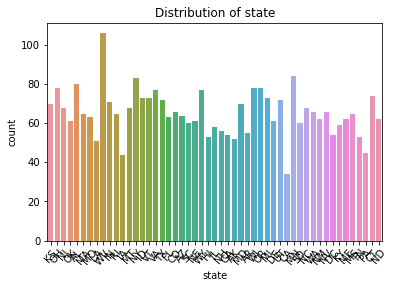

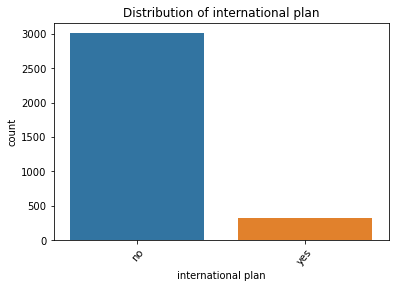

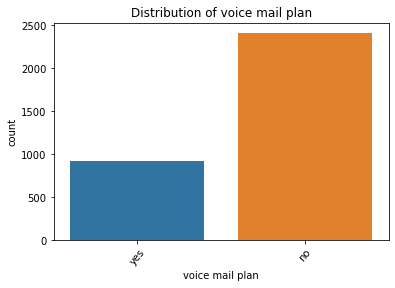

In [86]:
for column in df.select_dtypes(include=['object']).columns:
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=50)
    plt.show()

1.2. Overview of Categorical Features

Check the distribution of categorical features.

In [87]:
# Define categorical features
categorical_features = ['state', 'international plan', 'voice mail plan']

# Count frequency of each category in categorical features
for feature in categorical_features:
    frequency = df[feature].value_counts()
    print(f"Distribution of {feature}:")
    print(frequency)
    print()

Distribution of state:
WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
WA     66
CO     66
NV     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
DE     61
OK     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

Distribution of international plan:
no     3010
yes     323
Name: international plan, dtype: int64

Distribution of voice mail plan:
no     2411
yes     922
Name: voice mail plan, dtype: int64



In [88]:
# print number of labels in International variable

print('International plan contains', len(df['international plan'].unique()), 'labels')

International plan contains 2 labels


In [89]:
# check frequency distribution of values in internatioal plan variable

df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [90]:
# check frequency distribution of values in voice mail plan variable

df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

The distribution results for our categorical features are as follows:

1. Distribution of state
The state column has a fairly balanced distribution with some states having slightly higher counts:

Most Common:
WV (106)
MN (84)
NY (83)
Least Common:
CA (34)
The distribution seems reasonable, though some states are more common than others. This is normal and reflects the geographical spread of our customer base.

2. Distribution of international plan
The distribution for the international plan feature shows:

No: 3010
Yes: 323
This indicates a strong imbalance with a significantly larger proportion of customers not having an international plan.

3. Distribution of voice mail plan
The distribution for the voice mail plan feature shows:

No: 2411
Yes: 922
This also indicates a noticeable imbalance, though not as extreme as the international plan.

# Calculate Imbalance Ratios

Compute the ratio of the majority class to the minority class. A high ratio indicates significant imbalance.

In [91]:
# Calculate imbalance ratios for each categorical feature
for feature in categorical_features:
    counts = df[feature].value_counts()
    imbalance_ratio = counts.max() / counts.min()
    print(f"Imbalance ratio for {feature}: {imbalance_ratio}")

Imbalance ratio for state: 3.1176470588235294
Imbalance ratio for international plan: 9.318885448916408
Imbalance ratio for voice mail plan: 2.6149674620390457


Imbalance Ratios Interpretation
state: 3.12

This ratio suggests a moderate level of imbalance among the states. Some states have significantly more entries compared to others. While not extreme, it's worth considering if certain states are overrepresented or underrepresented.

international plan: 9.32

This indicates a high imbalance between 'yes' and 'no' categories. 'No' is vastly more common than 'yes'. This can impact model performance, as models may become biased towards the majority class.

voice mail plan: 2.61

This ratio indicates a moderate imbalance, with 'no' being more common than 'yes'. While less severe than the international plan, it still suggests that 'no' is more prevalent.

1.3. Churn Distribution

Examine the distribution of the target variable (churn).

In [92]:
print(df['churn'].value_counts())

False    2850
True      483
Name: churn, dtype: int64


2. Data Preprocessing
   
   2.1. Convert Categorical Variables

Convert categorical features to numerical using one-hot encoding.

In [93]:
#df = pd.get_dummies(df, columns=['state', 'international plan', 'voice mail plan'], drop_first=True)

# 2. Now that we have looked at the categorical features lets look at the numerical features.

Distribution Plots: Use histograms  plots to visualize the distribution of each numeric feature.

2.1. Handling Outliers

Boxplots: Identify outliers using boxplots.

1. Define X and y

X: This should include all our feature columns (numeric and categorical).

y: This is our target variable (churn).

In [94]:
# Features`
X = df.drop(columns=['churn'])  
#Target variable (churn)
y = df['churn']  

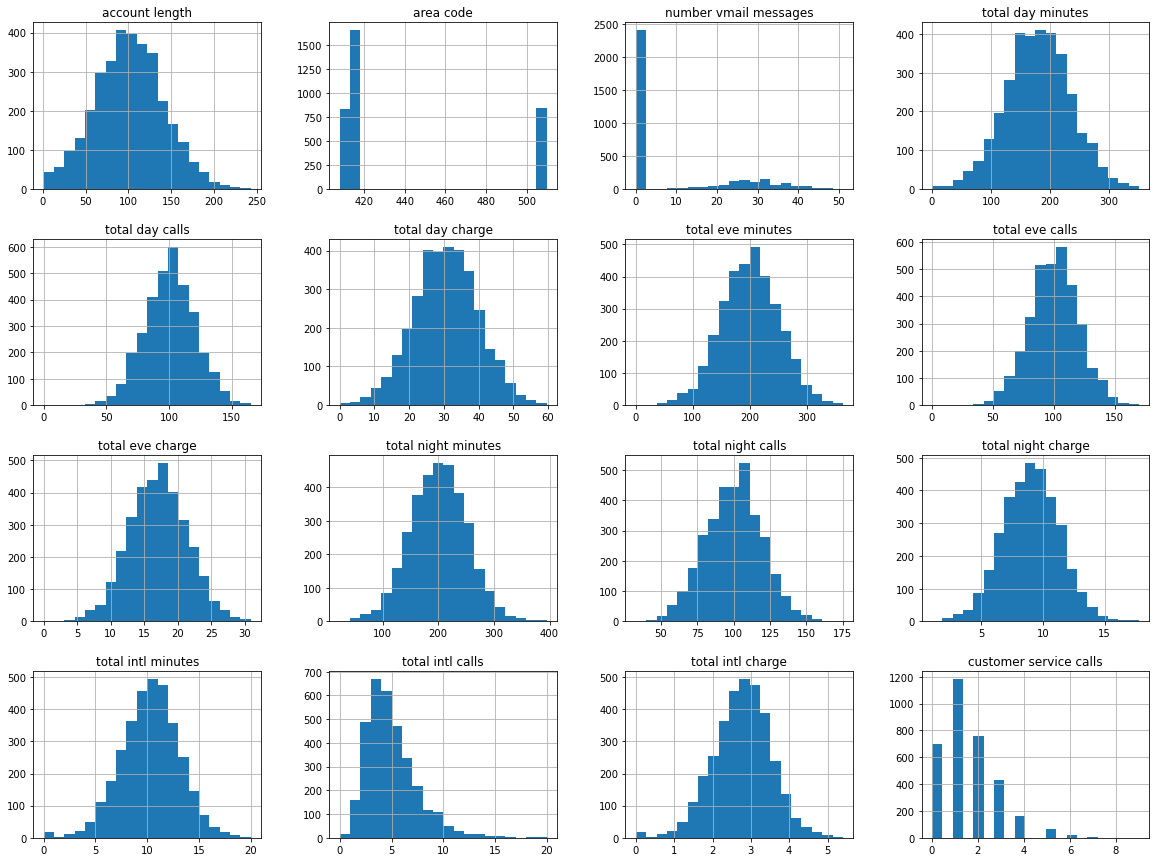

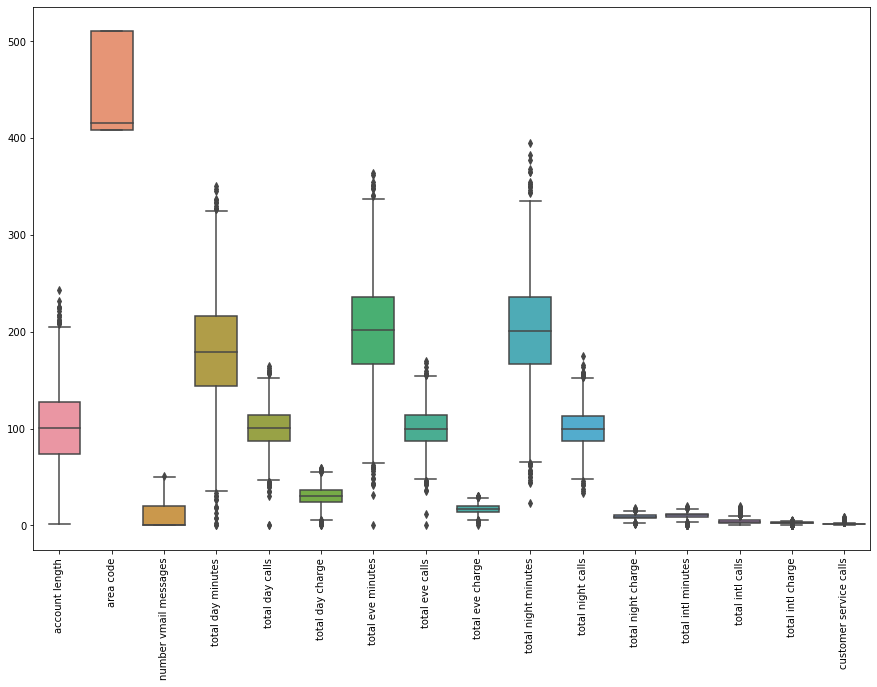

In [95]:
# Histograms
X.hist(bins=20, figsize=(20, 15))
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()

In [96]:
# IQR Method
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

# Print outliers
print(outliers.sum())  # Count of outliers in each feature

account length             18
area code                   0
customer service calls    267
international plan          0
number vmail messages       1
state                       0
total day calls            23
total day charge           25
total day minutes          25
total eve calls            20
total eve charge           24
total eve minutes          24
total intl calls           78
total intl charge          49
total intl minutes         46
total night calls          22
total night charge         30
total night minutes        30
voice mail plan             0
dtype: int64


In [101]:
# Option 2: Cap/Floor Outliers
X_capped = X.copy()
X_capped = np.where(X < (Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, X)
X_capped = np.where(X > (Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, X)

ValueError: operands could not be broadcast together with shapes (3333,19) (16,) (3333,19) 

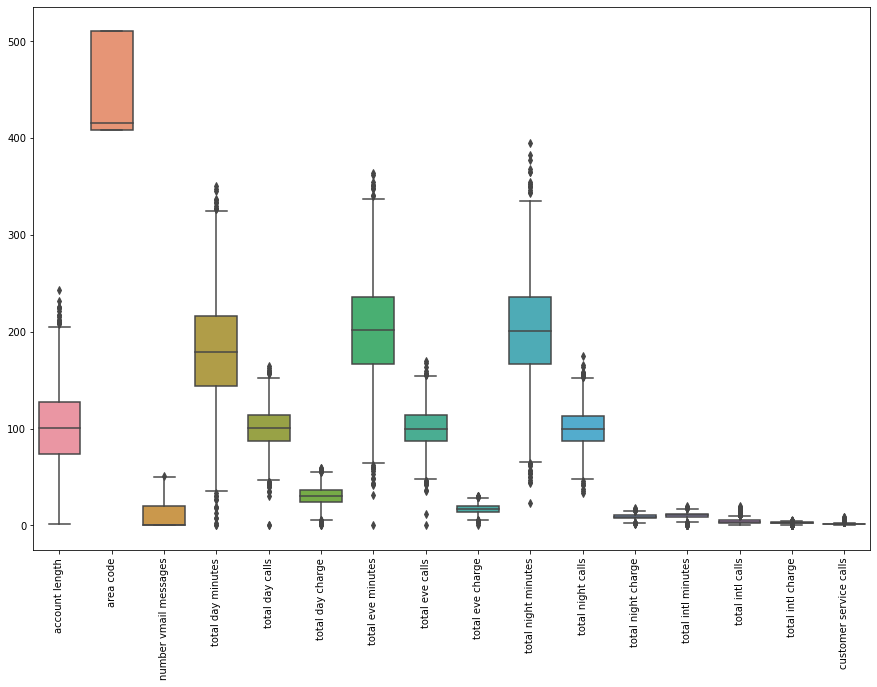

In [100]:
# Boxplots after handling outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_capped)
plt.xticks(rotation=90)
plt.show()

In [104]:
from scipy import stats

# Z-score to detect outliers
z_scores = stats.zscore(X.select_dtypes(include=[float, int]))
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
outliers


array([False, False, False, ..., False, False, False])

 # Feature Scaling
 
Standardization: Useful if features have different units. It rescales features to have a mean of 0 and a standard deviation of 1.
Normalization: Rescales the features to a range of [0, 1], often useful for algorithms like Logistic Regression.

In [105]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[float, int]))

# Normalization
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X.select_dtypes(include=[float, int]))

 # Feature Engineering
Interactions: Consider creating interaction terms if certain combinations of features could have a significant impact on the target.
Polynomial Features: Create polynomial features if non-linear relationships are suspected.

In [106]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X.select_dtypes(include=[float, int]))

# Feature Selection

Feature Importance: Use models like Random Forest or Logistic Regression with regularization to identify the most important numeric features.
Univariate Feature Selection: Use statistical tests to select features that have the strongest relationship with the target variable.

In [107]:
from sklearn.feature_selection import SelectKBest, f_classif

# Univariate feature selection
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_scaled, y)
print(selector.scores_)

[146.35078522 146.35065699  28.93257664  28.92644376   4.20149555
   4.20213628  15.58346799  15.59258061]


# Combine Preprocessed Features

If you’ve scaled or transformed your numeric features, combine them with your encoded categorical features before modeling.

In [108]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume `categorical_features` are the columns that need encoding
categorical_features = ['state', 'international plan', 'voice mail plan']
numeric_features = X.select_dtypes(include=[float, int]).columns.tolist()

# OneHotEncode categorical features and combine with scaled numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # or use your preferred scaler
        ('cat', OneHotEncoder(), categorical_features)])

# Preprocessing pipeline
X_processed = preprocessor.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))

[[630 227]
 [ 53  90]]
              precision    recall  f1-score   support

       False       0.92      0.74      0.82       857
        True       0.28      0.63      0.39       143

    accuracy                           0.72      1000
   macro avg       0.60      0.68      0.60      1000
weighted avg       0.83      0.72      0.76      1000

AUC-ROC Score: 0.7300144429666017


# Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Decision Tree model
dt = DecisionTreeClassifier(class_weight='balanced', random_state=1)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:, 1]

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))

[[765  92]
 [ 68  75]]
              precision    recall  f1-score   support

       False       0.92      0.89      0.91       857
        True       0.45      0.52      0.48       143

    accuracy                           0.84      1000
   macro avg       0.68      0.71      0.69      1000
weighted avg       0.85      0.84      0.85      1000

AUC-ROC Score: 0.708562149635662


2.2. Feature and Target Variable

Separate features and target variable.

# 3. Data Splitting
  
    ## 3.1. Split the Data

Divide the data into training and testing sets.

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Model Building
  4.1. Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'RI'

4.2. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

[[856   1]
 [ 60  83]]
              precision    recall  f1-score   support

       False       0.93      1.00      0.97       857
        True       0.99      0.58      0.73       143

    accuracy                           0.94      1000
   macro avg       0.96      0.79      0.85      1000
weighted avg       0.94      0.94      0.93      1000



# 5. Feature Importance
  
  5.1. Analyze Feature Importance

Check feature importance from the Random Forest model.

In [ ]:
importances = rf_clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                   Feature  Importance
5         total day charge    0.127207
3        total day minutes    0.115827
15  customer service calls    0.105351
66  international plan_yes    0.069539
8         total eve charge    0.057186
..                     ...         ...
51                state_OK    0.000776
26                state_HI    0.000669
43                state_ND    0.000654
27                state_IA    0.000652
39                state_MO    0.000614

[68 rows x 2 columns]


# 6. Model Evaluation
  
   6.1. ROC Curve and AUC

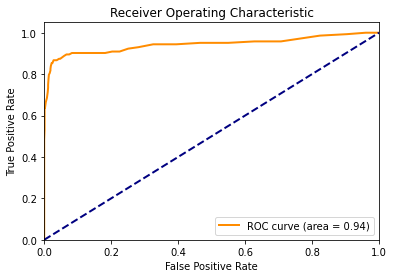

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability scores
y_probs = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

7.2. Provide Recommendations

Based on the model’s predictions and feature importances, suggest strategies to reduce churn (e.g., targeted promotions, improved customer service).
Feel free to reach out if you need more help with specific steps or any further analysis!

# 1. Model Building with Decision Trees
    1.1. Import Necessary Libraries

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1.2. Initialize and Train the Decision Tree Classifier

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_classifier.predict(X_test)

1.3. Evaluate the Model

In [ ]:
# Evaluate the Decision Tree model
print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

[[819  38]
 [ 40 103]]
              precision    recall  f1-score   support

       False       0.95      0.96      0.95       857
        True       0.73      0.72      0.73       143

    accuracy                           0.92      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.92      0.92      0.92      1000



# 2. Model Tuning and Visualization
   2.1. Hyperparameter Tuning

Decision Trees have several hyperparameters that you can tune to improve model performance, such as max_depth, min_samples_split, and min_samples_leaf.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best model
best_dt_classifier = grid_search.best_estimator_

# Make predictions with the best model
best_dt_y_pred = best_dt_classifier.predict(X_test)

# Evaluate the best model
print(confusion_matrix(y_test, best_dt_y_pred))
print(classification_report(y_test, best_dt_y_pred))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
[[839  18]
 [ 42 101]]
              precision    recall  f1-score   support

       False       0.95      0.98      0.97       857
        True       0.85      0.71      0.77       143

    accuracy                           0.94      1000
   macro avg       0.90      0.84      0.87      1000
weighted avg       0.94      0.94      0.94      1000



# Analysis
Accuracy: 94% - The model is performing well overall.

Precision and Recall for Churn (True):

Precision: 0.85 - Of all the customers predicted to churn, 85% actually churned.
Recall: 0.71 - Of all the customers who actually churned, 71% were correctly identified.
F1-Score: 0.77 - The harmonic mean of precision and recall, indicating a balanced performance.
Precision and Recall for Non-Churn (False):

Precision: 0.95 - Of all the customers predicted not to churn, 95% actually did not churn.
Recall: 0.98 - Of all the customers who did not churn, 98% were correctly identified.
F1-Score: 0.97 - High balance between precision and recall for non-churn cases.

# 2.2. Visualize the Decision Tree

Visualizing the Decision Tree can help understand how the model makes decisions.

In [ ]:
from sklearn.tree import export_text

# Print textual representation of the decision tree
tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
print(tree_rules)

|--- total day minutes <= 263.55
|   |--- customer service calls <= 3.50
|   |   |--- international plan_yes <= 0.50
|   |   |   |--- total day minutes <= 223.25
|   |   |   |   |--- total eve charge <= 29.00
|   |   |   |   |   |--- total eve charge <= 14.35
|   |   |   |   |   |   |--- number vmail messages <= 46.50
|   |   |   |   |   |   |   |--- account length <= 146.50
|   |   |   |   |   |   |   |   |--- state_CO <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- state_CO >  0.50
|   |   |   |   |   |   |   |   |   |--- total eve charge <= 8.98
|   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |--- total eve charge >  8.98
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- account length >  146.50
|   |   |   |   |   |   |   |   |--- state_ID <= 0.50
|   |   |   |   |   |   |   |   |   |--- state_MT <= 0.50
|   |   |   |   |   |   |   |   |   |   |--

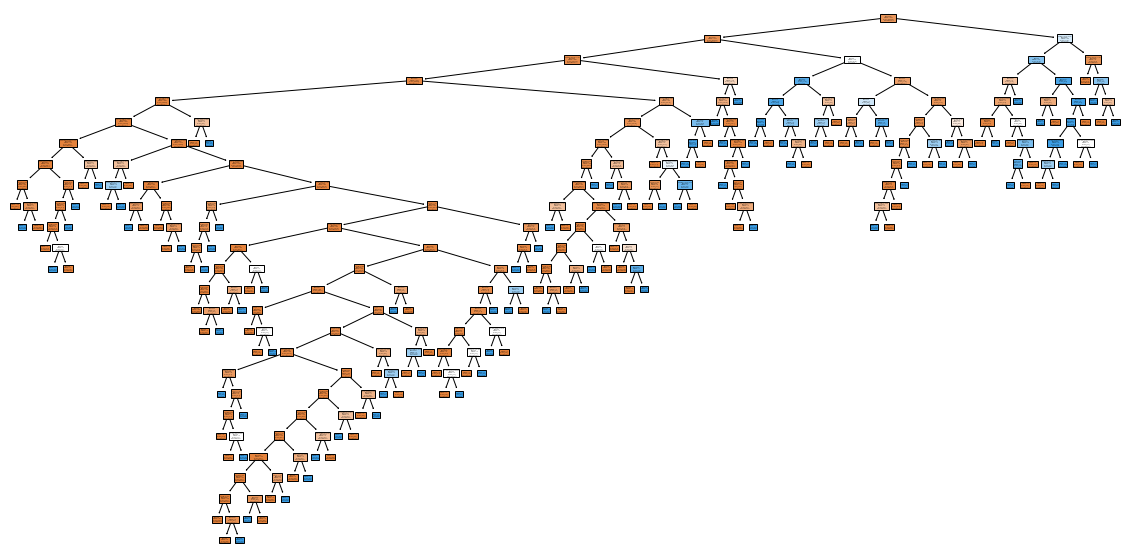

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Churn', 'Churn'], filled=True)
plt.show()

# 3. Feature Importance
   3.1. Analyze Feature Importance

Determine which features are most influential in predicting churn.

In [ ]:
importances = dt_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                   Feature  Importance
3        total day minutes    0.197097
15  customer service calls    0.116224
13        total intl calls    0.091070
66  international plan_yes    0.078055
12      total intl minutes    0.070569
..                     ...         ...
54                state_RI    0.000000
43                state_ND    0.000000
45                state_NH    0.000000
51                state_OK    0.000000
21                state_CT    0.000000

[68 rows x 2 columns]


# 4. Model Evaluation
  
  4.1. ROC Curve and AUC

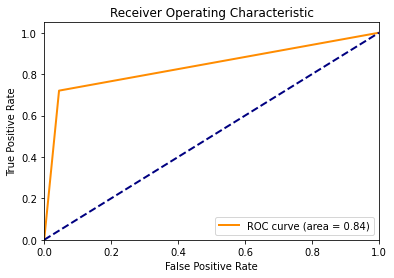

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the probability scores
dt_y_probs = dt_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, dt_y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()